## 制作模型预测结果的在市中心的空间分布
图7显示了市中心的建筑实例级模型性能。蓝色表示旧建筑被预测为新建筑，而粉色表示模型将新建筑预测为旧建筑。灰色表示预测正确。
![Fig. 7. Building instance level prediction performance.jpeg](https://image-1315363329.cos.ap-shanghai.myqcloud.com/lessons/202310241606786.jpeg)

In [1]:
## 读取数据
import pandas as pd

df1 = pd.read_csv('predictions_with_building_age_model_6_on_test_data.csv')
df2 = pd.read_csv('predictions_with_building_age_model_6_on_train_data.csv')
df = pd.concat([df1, df2])
df.head()

,id,prediction,true_label
0,363100012103594,7,7
1,363100012110942,4,4
2,363100012174221,8,8
3,363100012198469,6,7
4,363100012232265,6,6


In [2]:
## 按照4.1.3的方法重新排列类别（我们将“pre-1652”的索引从8更改为0，其他类别相应地向后移动），方便计算
 
# 我们需要更新标签以反映这个新顺序
# 这意味着我们需要将所有的8替换为0，然后将其他所有数字加1（因为我们把'–1652'放在了最前面）
df['true_label'] = df['true_label'].apply(lambda x: x + 1 if x < 8 else 0)
df['prediction'] = df['prediction'].apply(lambda x: x + 1 if x < 8 else 0)
df.head()

,id,prediction,true_label
0,363100012103594,8,8
1,363100012110942,5,5
2,363100012174221,0,0
3,363100012198469,7,8
4,363100012232265,7,7


In [3]:
## 新增一列差值
df['diff'] = df['prediction'] - df['true_label']
df.head()

,id,prediction,true_label,diff
0,363100012103594,8,8,0
1,363100012110942,5,5,0
2,363100012174221,0,0,0
3,363100012198469,7,8,-1
4,363100012232265,7,7,0


负数为预测为旧建筑，正数为预测为新建筑，0为预测正确。差值为偏离真实值的程度。

In [4]:
# 把类别名字换回来，方便阅读
updated_class_dict = {
    0: '–1652',  # 这个现在是第一个
    1: '-1706',
    2: '-1765',
    3: '-1846',
    4: '-1911',
    5: '-1944',
    6: '-1978',
    7: '–1995',
    8: '–2023'  # 这个现在是最后一个
}
df['true_label'] = df['true_label'].apply(lambda x: updated_class_dict[x])
df['pre_label'] = df['prediction'].apply(lambda x: updated_class_dict[x])

In [5]:
df.drop(columns=['prediction'], inplace=True)

In [6]:
df.head()

,id,true_label,diff,pre_label
0,363100012103594,–2023,0,–2023
1,363100012110942,-1944,0,-1944
2,363100012174221,–1652,0,–1652
3,363100012198469,–2023,-1,–1995
4,363100012232265,–1995,0,–1995


In [7]:
df.id

0        363100012103594
1        363100012110942
2        363100012174221
3        363100012198469
4        363100012232265
              ...       
63637    363100012118012
63638    363100012196527
63639    363100012226712
63640    363100012246785
63641    363100012074968
Name: id, Length: 79553, dtype: int64

In [8]:
## 处理id列 原地理数据的id时16位 
# 将 id 转换为字符串，确保其长度为 16 个字符，必要时用前导零填充。
df['id'] = df['id'].apply(lambda x: f"{int(x):016}")
df['id'].head()

0    0363100012103594
1    0363100012110942
2    0363100012174221
3    0363100012198469
4    0363100012232265
Name: id, dtype: object

In [9]:
# save
df.to_csv('predictions_with_building_age_diff_citywide.csv', index=False)

In [10]:
# 读取建筑物的信息
import geopandas as gpd
gdb = r"../../5-ArcgisPro工程/建筑风格和年代深度学习.gdb"
lr_name = 'Amsterdam_buildings_Project'
gdf = gpd.read_file(filename=gdb, layer=lr_name)
gdf

,rdf_seealso,identificatie,bouwjaar,status,gebruiksdoel,oppervlakte_min,oppervlakte_max,aantal_verblijfsobjecten,geom_Length,geom_Area,geometry
0,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012061709,2007,Pand in gebruik,woonfunctie,331.0,331.0,1,60.067413,173.201627,"MULTIPOLYGON (((635512.808 5802343.021, 635518..."
1,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012061225,1923,Pand in gebruik,woonfunctie,84.0,84.0,1,28.671057,48.016138,"MULTIPOLYGON (((628083.847 5808893.547, 628087..."
2,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012061228,2004,Pand in gebruik,woonfunctie,93.0,128.0,2,38.826189,80.168377,"MULTIPOLYGON (((635718.103 5802400.059, 635709..."
3,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012062224,1916,Pand in gebruik,woonfunctie,50.0,80.0,4,36.203712,61.107085,"MULTIPOLYGON (((632084.702 5803319.551, 632084..."
4,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012063200,1965,Pand in gebruik,overige gebruiksfunctie,1.0,1.0,1,18.999679,19.500827,"MULTIPOLYGON (((628012.652 5798762.544, 628013..."
...,...,...,...,...,...,...,...,...,...,...,...
163205,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012108647,1930,Verbouwing pand,woonfunctie,55.0,74.0,4,40.131014,85.559206,"MULTIPOLYGON (((626035.853 5801868.062, 626049..."
163206,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012205962,1930,Verbouwing pand,NaN,NaN,NaN,0,12.798413,10.147451,"MULTIPOLYGON (((626055.874 5801865.515, 626059..."
163207,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012071006,1930,Pand in gebruik,woonfunctie,97.0,108.0,3,43.029830,105.224237,"MULTIPOLYGON (((626261.380 5802821.801, 626261..."
163208,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012086580,1930,Pand in gebruik,woonfunctie,103.0,111.0,3,49.600137,112.567086,"MULTIPOLYGON (((626265.463 5802767.599, 626265..."


In [11]:
# 选取需要的列
gdf = gdf[['identificatie', 'geometry']]
gdf.head()

,identificatie,geometry
0,0363100012061709,"MULTIPOLYGON (((635512.808 5802343.021, 635518..."
1,0363100012061225,"MULTIPOLYGON (((628083.847 5808893.547, 628087..."
2,0363100012061228,"MULTIPOLYGON (((635718.103 5802400.059, 635709..."
3,0363100012062224,"MULTIPOLYGON (((632084.702 5803319.551, 632084..."
4,0363100012063200,"MULTIPOLYGON (((628012.652 5798762.544, 628013..."


In [12]:
## 合并两种数据
df_merge = pd.merge(left=gdf, right=df, left_on='identificatie', right_on='id', how='outer')
df_merge.head()

,identificatie,geometry,id,true_label,diff,pre_label
0,0363100012061709,"MULTIPOLYGON (((635512.808 5802343.021, 635518...",NaN,NaN,NaN,NaN
1,0363100012061225,"MULTIPOLYGON (((628083.847 5808893.547, 628087...",NaN,NaN,NaN,NaN
2,0363100012061228,"MULTIPOLYGON (((635718.103 5802400.059, 635709...",0363100012061228,–2023,0.0,–2023
3,0363100012062224,"MULTIPOLYGON (((632084.702 5803319.551, 632084...",NaN,NaN,NaN,NaN
4,0363100012063200,"MULTIPOLYGON (((628012.652 5798762.544, 628013...",NaN,NaN,NaN,NaN


In [13]:
# # 转换为geodataframe
# df_merge = gpd.GeoDataFrame(df_merge, geometry='geometry')

In [14]:
# ## 可以先绘制city_center_boundary_box看一下
# city_center_boundary_box = gpd.read_file(filename=gdb, layer='city_center_boundary_box')
# city_center_boundary_box

In [15]:
# # 选取市中心的建筑
# df_merge = gpd.sjoin(df_merge, city_center_boundary_box, how='inner', op='within')
# df_merge.plot()

In [16]:
# 看一下diff非空值所占的比例，即有效数据的比例
df_merge['diff'].notnull().sum() / df_merge.shape[0]

0.4870035261276262

<Axes: >

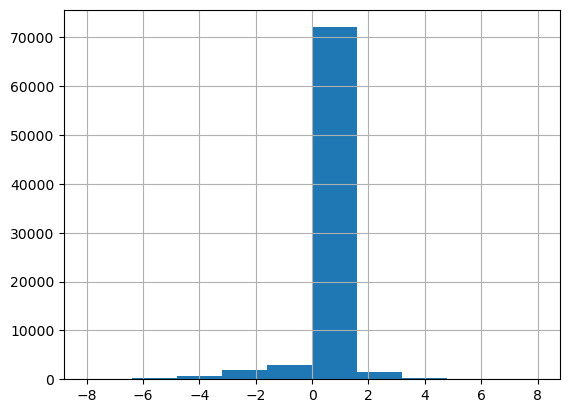

In [17]:
# 看一下diff的分布
df_merge['diff'].hist()

### 接下来来绘图，我喜欢在arcgis pro中绘图 所以我们把gdf_merge导出到数据库

In [18]:
df_merge.crs

<Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 0°E and 6°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Andorra. Belgium. Benin. Burkina Faso. Denmark - North Sea. France. Germany - North Sea. Ghana. Luxembourg. Mali. Netherlands. Niger. Nigeria. Norway. Spain. Togo. United Kingdom (UK) - North Sea.
- bounds: (0.0, 0.0, 6.0, 84.0)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
# # save
df_merge.to_file(filename=gdb, layer='predictions_with_building_age_diff_city_wide')

粉色代表新建筑被预测为旧建筑，蓝色代表旧建筑被预测为新建筑。
![阿姆斯特丹市中心建筑年代预测结果空间分布](../../5-ArcgisPro工程/阿姆斯特丹市中心建筑年代预测结果空间分布.jpg)

In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon, Point
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'geopandas'

In [21]:
from shapely.geometry import box
# 创建150米的网格
xmin, ymin, xmax, ymax = df_merge.total_bounds
# 创建一个表示边界的 'box'（矩形多边形）
bbox_geometry = box(xmin, ymin, xmax, ymax)
# 创建一个GeoDataFrame，其中包含你的边界框
gdf_bbox = gpd.GeoDataFrame({'geometry': bbox_geometry}, index=[0]).set_crs(32631)
gdf_bbox

,geometry
0,"POLYGON ((640252.432 5798425.740, 640252.432 5..."


In [22]:
def create_grid(gdf, grid_size):
    """
    gdf: 地理边界的gdf
    grid_size: 网格的大小（例如150米）
    """
    # 计算网格的边界
    xmin, ymin, xmax, ymax = gdf.total_bounds
    wide = (xmax - xmin) / grid_size
    length = (ymax - ymin) / grid_size

    # 创建网格点
    x_left_origin = xmin
    x_right_origin = xmin + grid_size
    y_top_origin = ymax
    y_bottom_origin = ymax - grid_size

    polygons = []
    for i in range(int(wide)):
        y_top = y_top_origin
        y_bottom = y_bottom_origin
        for j in range(int(length)):
            polygons.append(Polygon([(x_left_origin, y_top), (x_right_origin, y_top), 
                                     (x_right_origin, y_bottom), (x_left_origin, y_bottom)]))
            y_top = y_top - grid_size
            y_bottom = y_bottom - grid_size
        x_left_origin = x_left_origin + grid_size
        x_right_origin = x_right_origin + grid_size

    grid = gpd.GeoDataFrame({'geometry': polygons})
    grid.crs = "32631"

    return grid


In [23]:
grid = create_grid(gdf_bbox, 150)
grid

,geometry
0,"POLYGON ((617784.839 5810551.857, 617934.839 5..."
1,"POLYGON ((617784.839 5810401.857, 617934.839 5..."
2,"POLYGON ((617784.839 5810251.857, 617934.839 5..."
3,"POLYGON ((617784.839 5810101.857, 617934.839 5..."
4,"POLYGON ((617784.839 5809951.857, 617934.839 5..."
...,...
11915,"POLYGON ((639984.839 5799301.857, 640134.839 5..."
11916,"POLYGON ((639984.839 5799151.857, 640134.839 5..."
11917,"POLYGON ((639984.839 5799001.857, 640134.839 5..."
11918,"POLYGON ((639984.839 5798851.857, 640134.839 5..."


<Axes: >

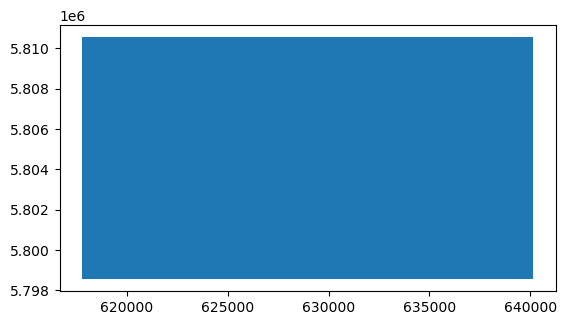

In [100]:
grid.plot()

In [24]:
df_correct = df_merge[df_merge['diff'] == 0.0]
df_correct

,identificatie,geometry,id,true_label,diff,pre_label
2,0363100012061228,"MULTIPOLYGON (((635718.103 5802400.059, 635709...",0363100012061228,–2023,0.0,–2023
15,0363100012062297,"MULTIPOLYGON (((632171.135 5802791.044, 632172...",0363100012062297,–1995,0.0,–1995
16,0363100012061309,"MULTIPOLYGON (((636697.626 5801997.981, 636668...",0363100012061309,–2023,0.0,–2023
18,0363100012061803,"MULTIPOLYGON (((636001.110 5802124.956, 635996...",0363100012061803,–2023,0.0,–2023
25,0363100012061353,"MULTIPOLYGON (((632452.546 5803001.755, 632451...",0363100012061353,–1995,0.0,–1995
...,...,...,...,...,...,...
163344,0363100012092942,"MULTIPOLYGON (((626101.479 5802327.177, 626101...",0363100012092942,-1944,0.0,-1944
163345,0363100012085919,"MULTIPOLYGON (((625832.237 5802103.831, 625832...",0363100012085919,-1944,0.0,-1944
163348,0363100012205962,"MULTIPOLYGON (((626055.874 5801865.515, 626059...",0363100012205962,-1944,0.0,-1944
163349,0363100012071006,"MULTIPOLYGON (((626261.380 5802821.801, 626261...",0363100012071006,-1944,0.0,-1944


In [25]:
# 空间连接：找出每个网格中的点
joined = gpd.sjoin( grid,df_correct, how='inner', op='intersects')
joined

C:\Users\hncdj\anaconda3\envs\dl\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,geometry,index_right,identificatie,id,true_label,diff,pre_label
661,"POLYGON ((618984.839 5807401.857, 619134.839 5...",162191,0363100012152186,0363100012152186,–2023,0.0,–2023
662,"POLYGON ((618984.839 5807251.857, 619134.839 5...",162191,0363100012152186,0363100012152186,–2023,0.0,–2023
821,"POLYGON ((619284.839 5807401.857, 619434.839 5...",120580,0363100012243832,0363100012243832,–2023,0.0,–2023
822,"POLYGON ((619284.839 5807251.857, 619434.839 5...",120580,0363100012243832,0363100012243832,–2023,0.0,–2023
902,"POLYGON ((619434.839 5807251.857, 619584.839 5...",120580,0363100012243832,0363100012243832,–2023,0.0,–2023
...,...,...,...,...,...,...,...
10300,"POLYGON ((636984.839 5801551.857, 637134.839 5...",15978,0363100012239532,0363100012239532,–2023,0.0,–2023
10300,"POLYGON ((636984.839 5801551.857, 637134.839 5...",15963,0363100012239530,0363100012239530,–2023,0.0,–2023
10300,"POLYGON ((636984.839 5801551.857, 637134.839 5...",15961,0363100012239528,0363100012239528,–2023,0.0,–2023
10300,"POLYGON ((636984.839 5801551.857, 637134.839 5...",15606,0363100012244146,0363100012244146,–2023,0.0,–2023


In [27]:
grid['building_count'] = joined['index_right'].groupby(joined.index).count()  # 计算每个网格中的建筑数量
grid['building_count']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
11915   NaN
11916   NaN
11917   NaN
11918   NaN
11919   NaN
Name: building_count, Length: 11920, dtype: float64

In [28]:
grid['building_count'].dropna(how='any')

661       1.0
662       1.0
821       1.0
822       1.0
902       1.0
         ... 
10297     5.0
10298    54.0
10299    46.0
10300     8.0
10377     3.0
Name: building_count, Length: 3017, dtype: float64

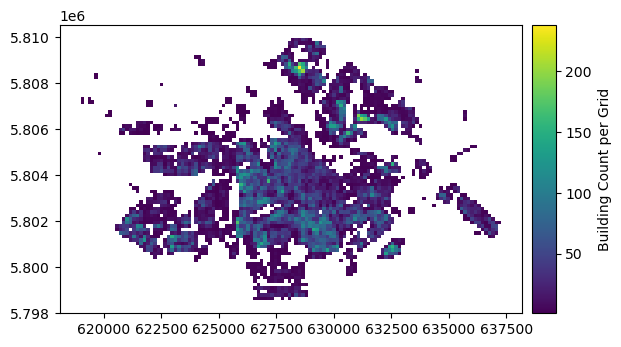

In [30]:
fig, ax = plt.subplots(1, 1)
from mpl_toolkits.axes_grid1 import make_axes_locatable

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
grid.plot(column='building_count', ax=ax, legend=True, cax=cax, cmap='viridis', 
          legend_kwds={'label': "Building Count per Grid"})
plt.show()


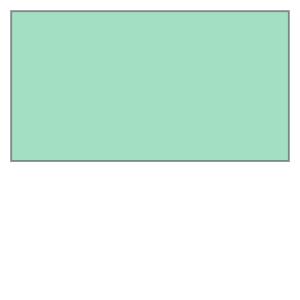

In [64]:
from shapely.geometry import Point
from shapely.geometry import box
# 创建150米的网格
xmin, ymin, xmax, ymax = df_merge.total_bounds
# 创建一个表示边界的 'box'（矩形多边形）
bbox_geometry = box(xmin, ymin, xmax, ymax)
bbox_geometry

In [66]:
import numpy as np
from shapely.geometry import box
# 创建一个GeoDataFrame，其中包含你的边界框
gdf_bbox = gpd.GeoDataFrame({'geometry': bbox_geometry}, index=[0]).set_crs(32631)
gdf_bbox

,geometry
0,"POLYGON ((640252.432 5798425.740, 640252.432 5..."


In [69]:
# 创建x和y的坐标点
grid_size = 150
x_coords = np.arange(xmin, xmax, grid_size)
y_coords = np.arange(ymin, ymax, grid_size)

# 从这些点创建一个网格
hlines = [((x1, yi), (x2, yi)) for x1, x2 in zip(x_coords[:-1], x_coords[1:]) for yi in y_coords]
vlines = [((xi, y1), (xi, y2)) for y1, y2 in zip(y_coords[:-1], y_coords[1:]) for xi in x_coords]
lines = hlines + vlines

# 将线转换为线性环（多边形的边界）
polygons = [box(*line[0], *line[1]) for line in lines]
polygons

[<POLYGON ((617934.839 5798425.74, 617934.839 5798425.74, 617784.839 5798425....>,
 <POLYGON ((617934.839 5798575.74, 617934.839 5798575.74, 617784.839 5798575....>,
 <POLYGON ((617934.839 5798725.74, 617934.839 5798725.74, 617784.839 5798725....>,
 <POLYGON ((617934.839 5798875.74, 617934.839 5798875.74, 617784.839 5798875....>,
 <POLYGON ((617934.839 5799025.74, 617934.839 5799025.74, 617784.839 5799025....>,
 <POLYGON ((617934.839 5799175.74, 617934.839 5799175.74, 617784.839 5799175....>,
 <POLYGON ((617934.839 5799325.74, 617934.839 5799325.74, 617784.839 5799325....>,
 <POLYGON ((617934.839 5799475.74, 617934.839 5799475.74, 617784.839 5799475....>,
 <POLYGON ((617934.839 5799625.74, 617934.839 5799625.74, 617784.839 5799625....>,
 <POLYGON ((617934.839 5799775.74, 617934.839 5799775.74, 617784.839 5799775....>,
 <POLYGON ((617934.839 5799925.74, 617934.839 5799925.74, 617784.839 5799925....>,
 <POLYGON ((617934.839 5800075.74, 617934.839 5800075.74, 617784.839 5800075....>,
 <PO

In [72]:
# 创建一个GeoDataFrame，其中包含这些多边形
gdf_grid = gpd.GeoDataFrame({'geometry': polygons}).set_crs(32631)
gdf_grid

,geometry
0,"POLYGON ((617934.839 5798425.740, 617934.839 5..."
1,"POLYGON ((617934.839 5798575.740, 617934.839 5..."
2,"POLYGON ((617934.839 5798725.740, 617934.839 5..."
3,"POLYGON ((617934.839 5798875.740, 617934.839 5..."
4,"POLYGON ((617934.839 5799025.740, 617934.839 5..."
...,...
24064,"POLYGON ((639534.839 5810275.740, 639534.839 5..."
24065,"POLYGON ((639684.839 5810275.740, 639684.839 5..."
24066,"POLYGON ((639834.839 5810275.740, 639834.839 5..."
24067,"POLYGON ((639984.839 5810275.740, 639984.839 5..."


<Axes: >

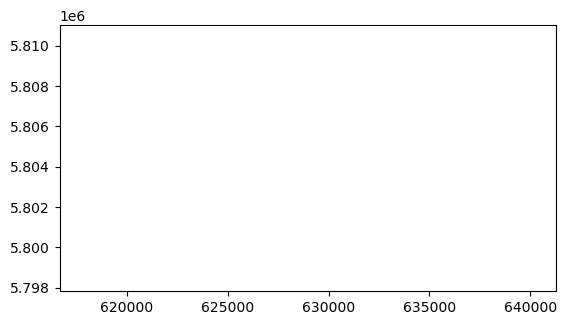

In [91]:
gdf_grid['ploygon_index'] = gdf_grid.index
gdf_grid.plot()

In [90]:
# 使用overlay函数来裁剪网格，使其与边界框对齐
clipped_grid = gpd.overlay(gdf_grid, df_merge, how='intersection')
clipped_grid

,ploygon_index,identificatie,id,true_label,diff,pre_label,geometry


<Axes: >

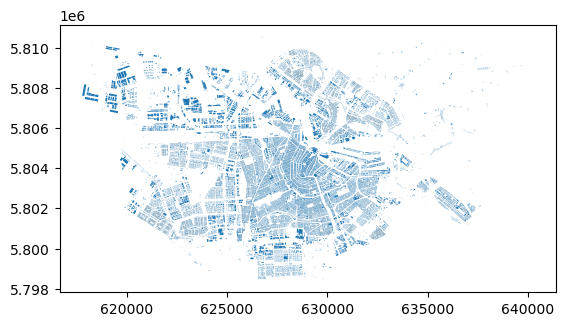

In [83]:
# 可视化结果
clipped_grid.plot()

In [84]:
clipped_grid['correct'] = clipped_grid[clipped_grid['diff'] == 0.0]['diff'].astype(int)
clipped_grid

,identificatie,id,true_label,diff,pre_label,geometry,correct
0,0363100012061709,NaN,NaN,NaN,NaN,"POLYGON ((635518.177 5802338.639, 635518.461 5...",NaN
1,0363100012061225,NaN,NaN,NaN,NaN,"POLYGON ((628087.674 5808898.796, 628089.158 5...",NaN
2,0363100012061228,0363100012061228,–2023,0.0,–2023,"POLYGON ((635709.565 5802389.660, 635704.960 5...",0.0
3,0363100012062224,NaN,NaN,NaN,NaN,"POLYGON ((632084.825 5803316.675, 632072.285 5...",NaN
4,0363100012063200,NaN,NaN,NaN,NaN,"POLYGON ((628013.017 5798756.054, 628010.021 5...",NaN
...,...,...,...,...,...,...,...
163347,0363100012108647,NaN,NaN,NaN,NaN,"POLYGON ((626049.762 5801868.549, 626049.982 5...",NaN
163348,0363100012205962,0363100012205962,-1944,0.0,-1944,"POLYGON ((626059.372 5801865.630, 626059.475 5...",0.0
163349,0363100012071006,0363100012071006,-1944,0.0,-1944,"POLYGON ((626261.504 5802819.064, 626261.587 5...",0.0
163350,0363100012086580,0363100012086580,-1944,0.0,-1944,"POLYGON ((626265.611 5802764.917, 626265.830 5...",0.0


In [88]:
clipped_grid = clipped_grid[['correct', 'geometry', 'polygon_index']].dropna(how='any')
clipped_grid

KeyError: "['polygon_index'] not in index"

In [86]:
print(type(clipped_grid))

<class 'geopandas.geodataframe.GeoDataFrame'>


### 使用 dissolve() 函数聚合几何特征。
# dissolve是geopandas中的一个方法，用于将具有共同属性的空间对象组合在一起。这类似于传统的GROUP BY操作，但它还同时合并了几何形状。 个方法计算GeoDataFrame中每个列的平均值。这是一个统计函数，通常应用于数值列。
https://geopandas.org/en/latest/docs/user_guide/aggregation_with_dissolve.html

In [87]:
clipped_grid.dissolve(by='polygon_index')

KeyError: 'polygon_index'

In [52]:
# 计算每个网格的准确率
spatial_averages = clipped_grid.dissolve(by='polygon_index').mean() 
spatial_averages

KeyError: 'geometry'

In [41]:
# 计算每个网格的准确率
accuracy = grid.groupby('id')['correct'].mean().reset_index() # 分组计算平均值 reset_index()将索引变为列

print(accuracy)

                     id  correct
0      0363100012061164      0.0
1      0363100012061165      0.0
2      0363100012061167      0.0
3      0363100012061169      0.0
4      0363100012061172      0.0
...                 ...      ...
79406  0363100012571563      NaN
79407  0363100012571580      0.0
79408  0363100012571600      0.0
79409  0363100012571615      0.0
79410  0363100012571620      NaN

[79411 rows x 2 columns]


In [ ]:
# 绘制准确率
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
accuracy.plot(column='correct', cmap='viridis', legend=True, ax=ax)
ax.set_title('Building Age Epoch Prediction - Accuracy Measured at 150m Grid Level')
plt.show()

## 计算莫兰指数Moran
